# Pruning

## Prerequisites
To start with pruning in Decision Tree, you must have an understanding of:
- Overfitting in the decision tree and early stopping technique to reduce overfitting.


## Learning Objective
- Understand the limitation/problem of early stopping criteria.
- Discuss pruning and list out different pruning techniques.
- Describe the working principle of cost-complexity pruning.
- Implement cost-complexity pruning in sklearn.




In Chapter 1, we introduced overfitting as a serious problem in a decision tree. To deal with overfitting in decision tree, we introduced two techniques:  __Early Stopping__ and __Pruning__. In Chapter 2, we talked about early stopping, and now in this chapter, we will talk about pruning. But before talking about pruning, let's discuss the problem with early stopping.

#### Problems with early stopping
Early stopping is not data-driven as we apply them early, before training a decision tree. While arbitrarily applying early stopping criteria, we may do it tightly(for instance, set max_depth to very low, say 1) or lightly(for instance, set max_depth to very large value). If we employ the early stopping criteria tightly, we tend to generate small and under fitted decision trees. On the other hand, employing these criteria lightly creates large decision trees that are still overfitted to the training set. We don't have any early information to decide the appropriate value for early stopping criteria.

 One of the solutions to this problem is cross-validation. Most of us are already familiar with cross-validation as it is can used for with machine learning algorithms too. But, here, we are interested to study a robust regularization technique which is particular used for decision tree. This technique is __pruning__.

## Pruning
Prune means to cut. Pruning involves growing a decision tree to its entirety and then recursively cutting/removing the nodes or sub-tree in a bottom-up approach. If removing the node/sub-tree improves the tree's performance on a validation dataset, then we keep the change, else revert it.


Experimentally, it is seen that employing pruning methods can improve the performance of the decision tree in the test dataset.

## Failure case of early stopping
 Before moving back into the pruning technique, let us briefly discuss a simple case where the early stopping fails. In the previous chapter, we talked about different early stopping techniques. One of them was __Impurity threshold__. Recall that in this method, we check if the current split results in impurity reduction greater than some specified value. If the reduction is greater than some specified value,  we split the node; else, we don't.

Let's see the effect of this technique on a decision tree used to solve the XOR problem.

Most of us are familiar with the XOR gate. The truth table of the XOR gate is shown in the table below. In the XOR problem, we try to model the XOR gate, i.e., given input $X_1$ and $X_2$ as input, we try to predict output $Y$. Meanwhile, most of you have already guessed that it is a classification problem. 

We selected this particular dataset because it allowed us to see how early stopping technique -- Impurity threshold -- fails.
 

|$X_1$   |$X_2$  |  $Y$  |
|----|----|----|
|   0 |  0   | 0|
|   0  |  1 | 1|
|   1 |  0   | 1|
|   1  |  1 | 0|
d

In the cell below, we create a dataset for the XOR problem. The dataset is same as shown in the above table. 

In [ ]:
import numpy as np


## Create dataset for XOR problem ##
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])
print("X:\n", X)
print("y:", y)

X:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 0]


In the cell below, we train the decision tree on the XOR dataset. To prevent a split of the node that does not yield reduction in the impurity, let us impose a minimum impurity reduction constraint. For this, we set __min_impurity_decrease__ to a very small number, i.e., 0.01.

Tree Structure 1


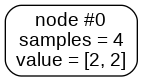

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from plot_tree import plot_tree # Refer chapter 1 for description on how this function works.


# Train a decision tree on XOR dataset with min_impurity_decrease set to 0.01.
clf = DecisionTreeClassifier(min_impurity_decrease = 0.01,random_state = 12)
clf.fit(X, y)  

# Plot the tree structure
print("Tree Structure 1")
plot_tree(clf)

This results in a single node, as shown in the above plot. This is because the split of this node doesn't reduce impurity by more than 0.01, which itself is a very low value.

Let's retrain a decision tree on the same data with __min_impurity_decrease__ set to default. The default value of __min_impurity_decrease__ is 0.

Tree Structure 2


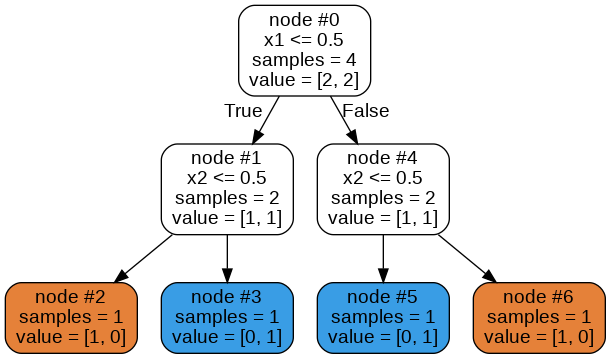

In [ ]:
# Train a decision tree on XOR dataset with min_impurity_decrease set to default(default: 0).
clf = DecisionTreeClassifier(random_state = 12)
clf.fit(X, y)  

print("Tree Structure 2")
plot_tree(clf)

If we carefully notice the above tree structure, there is no impurity reduction while splitting the root node(node #0).

__Note: You can use the formula for impurity reduction discussed in the previous chapter to verify there is no impurity reduction while splitting node #0.__

 So imposing the __min_impurity_decrease__ criteria did not produce the split(as shown in Tree Structure 1). However, there is a drastic reduction in impurity while splitting node #1 and node #4. Splitting of these nodes creates pure leaves.


From the above two experiment, we can see that the __impurity threshold__ constraint does not seek future possibilities, producing more fruitful benefits. It greedily seeks for the best immediate output without further exploring the future benefits.

The above argument clearly shows that we can't always rely blindly on early stopping as it doesn't explore all the future possibilities, some of which might come fruitful. To deal with this problem of early stopping, we use another technique called __pruning__. Pruning solves this issue by first growing a fully grown tree that explores all the possible spaces. We then remove the nodes only if they are insignificant(We test if nodes are insignificant using a separate validation dataset).

Note: Some of you might get confused with the threshold selected in the above plot, for instance, $X_1\le0.5$, and $X_2\le0.5$ though the value of features in $X_1$, and $X_2$ are only 0 and 1. It happens because this is how the CART algorithm works. Since CART only creates a binary split and tests the condition using the format '$\le$'. So, the mid-value between 0 and 1, i.e., 0.5, was selected to test the condition.

## Pruning Techniques
There are various pruning techniques in the decision tree; they are listed below:

1. Cost–Complexity Pruning 
2. Reduced Error Pruning
3. Minimum Error Pruning
4. Error–based Pruning (EBP)

Among these pruning techniques, the most popular one is Cost-Complexity Pruning. The basic working procedure of pruning is to test the performance of each subtree(sub-tree can be obtained by removing one or more nodes from the original tree) on a separate held-out dataset, i.e., on the validation set, and select the one that yields the best performance. However, Cost-Complexity Pruning also considers the complexity of a tree apart from performance on the validation set.

In this reading material, we will only discuss Cost-Complexity pruning. You can refer to the additional resources listed at the end of this notebook for other pruning techniques.

## Cost-Complexity Pruning

Cost-complexity pruning can be used for both classification and regression tasks. Cost-complexity pruning considers both the error(cost) and the complexity(size) of the decision tree while pruning.  The complexity of a tree can be expressed in different ways, like the number of nodes or depth or number of leaf nodes.It simply measures how much error is reduced by the presence of a particular branch of a particular size. If the presence of a branch doesn't reduce the error, then prune it. 

The working of Cost-Complexity pruning is described in the following steps as:  
1. Grow a fully grown decision tree.
2. Search for the weakest link (weakest link are characterized by node with the smallest value of $ \alpha $ --alpha-- [we will see it later]) and then prune(cut) it.
3. Repeat step 2 to generate a series of trees.
4. Test the performance of these trees on the validation set.
5. Select the tree that yields the best performance on the validation set.







Let's see the working of Cost-Complexity pruning with the help of example.

Suppose we train a decision tree on some data and obtain a tree labeled as __Tree 1__ with structure $T$ in the figure below.

<figure>
    <div align = "center">
 <!-- <img src="https://doc.google.com/a/fusemachines.com/uc?id=1pH-HsMvw1VlX1TIUgcQ-E_SGl_fiYAru" width=""> -->
  <img src="https://i.postimg.cc/3NpDNmVH/image.png" width="">
    </div>
    <div align = "center">
<figcaption>Figure 1: Series of trees <figcaption>
    </div>
 </figure>


We need to identify the weakest link --node/sub-tree with the least reduction in the error-- in this tree. The value of $\alpha$ gives a reduction in the error by a particular node. So, the node with a minimum value of $\alpha$ gives the weakest link.

Here, we compute the value of $\alpha$ for all the nodes in this tree. Suppose node 4 has the smallest value of alpha. So node 4 forms the weakest link. Now we prune this node(by this node we mean the sub-tree rooted at node 4), the node with the smallest value of $\alpha$, to obtain  __Tree 2__ with structure $T-T_1$. Here, $T-T_1$ indicates that a sub-tree $T_1$, rooted at node 4 is pruned from __Tree 1__. Similarly, in __Tree 2__ we find the value of $\alpha$ for all the nodes and suppose node 2 has the smallest value. We now prune it to obtain __Tree 3__ with structure $T-T_2$. Here, $T-T_2$ indicate that a branch $T_2$, rooted at node 2 is pruned from __Tree 2__.

In this way, we obtained three tree structures: $T$, $T-T_1$, and $T-T_2$ such that $T-T_2 \subseteq T-T_1 \subseteq T$. Now we compare the performance of these trees on a validation dataset. The tree with the best performance on the validation dataset will be selected as our final tree.




### How to obtain the weakest link?

The cost-complexity pruning technique compares the performance of a series of trees on the validation dataset to obtain an optimal tree. However, to obtain a series of trees, we need to locate the node that forms the weakest link, and then prune it. The weakest link of the tree is characterized by a node with the lowest value of alpha.

In this section, let's see how to compute the value of $\alpha$, and obtain the weakest link.

For each node $t$ in tree: 

1. Compute the error rate of a node. The error rate of any node ($t$) is given as:

$$r(t) = \frac{\text{number of samples misclassified in a node t}}{\text{number of all samples in a node t}}\quad\quad \text{  ;   for classification}$$

<br>

$$r(t) = \frac{\text{sum of squared error of samples in node t}}{\text{number of all samples in a node t}}\quad\quad \text{  ;   for regression}$$

2. Compute the error cost of a node. The error cost of any node($t$) is:
$$R(t) = r(t)*p(t)$$

 where $p(t)$ is the proportion of samples at node $t$ and is given as:

$$p(t) = \frac{\text{number of all samples in a node t}}{\text{total number of training samples}}$$


3. The sub-tree $T$ rooted at node $t$ is defined as a collection of node $t$ and all of its descendants.  The error cost for a sub-tree $T$ rooted at node $t$ is given as
$$R(T_t) = \sum R(i)$$

   where $i$ = all leaves in sub-tree, $T$, rooted at node $t$.
 


4. Compute $\alpha$ of node $t$ as:
$$\alpha_t = \frac{R(t)-R(T_t)}{N_T-1}$$

 where $N_T$ is the number of nodes in subtree $T$.
 

Weakest link corresponds to the node with smallest value of $\alpha$ 

 >   $\text{Weakest link}= argmin(\alpha_t)$  

 





### Calculation of $\alpha$
In this section, we will see how to compute the value of alpha of a node of a decision tree used for the classification task. Suppose a  sub-tree rooted at node #4 of the decision tree is shown in the figure below. Here we will compute the value of $\alpha$ of node #4. Suppose the number of training samples used to train the tree was 80.



<figure>
    <div align = "center">
 <!-- <img src="https://doc.google.com/a/fusemachines.com/uc?id=1WHYWK8dZTGMYU5UlgzsxPw6on3MfpbTZ" width="60%"> -->
  <img src="https://i.postimg.cc/wxNjZhN9/new4-edited.jpg" width="60%">
    </div>
    <div align = "center">
<figcaption>Figure 2: A branch of tree<figcaption>
    </div>
 </figure>

The node #4 has two leaf nodes, $N_T=2$. If this node is pruned, node #4 becomes a leaf node with label `class 0`, and 4 out of 29 samples will be misclassified.

1. The error rate of node #4 is 
$$r(t)=\frac{3+1}{25+3+1}=4/29$$

The proportion of samples in node #4 is $p(t) = \frac{29}{80}$. 
> __Note:__ The training samples contains 80 samples.

So, the error cost of this node is

$$
R(t) = r(t) \cdot p(t) = \frac{4}{29} \cdot \frac{29}{80} = \frac{1}{20}
$$


2. If the node #4 is not pruned, the error cost for the subtree is

$$
R(T_t) = \sum R(i) = \text{error cost for node \#5} + \text{error cost for node \#6}
$$

$$
= \left( \frac{4}{8} \cdot \frac{8}{80} \right) + \left( \frac{0}{21} \cdot \frac{21}{80} \right) = \frac{1}{20}
$$


3. Compute $\alpha$ as

$$
\alpha = \frac{R(t) - R(T_t)}{N_T - 1} = \frac{\frac{1}{20} - \frac{1}{20}}{2 - 1} = 0
$$






### Sklearn implementation

In this section, we will implement cost-complexity pruning in sklearn. For implementation, we will use the same synthetic dataset as used in the previous chapter.

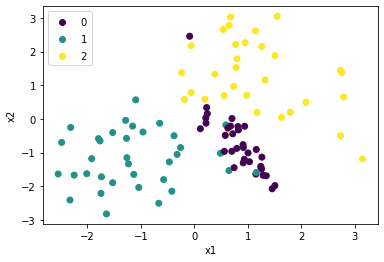

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 2,
                            n_redundant = 0, n_classes = 3, random_state = 10, 
                           flip_y = 0.02, class_sep = 1, n_clusters_per_class = 1)

scatter = plt.scatter(X[:,0],X[:, 1], c = y)
plt.legend(*scatter.legend_elements(), loc = 2)
plt.xlabel("x1")
plt.ylabel('x2')
plt.show()

X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.2, random_state = 32)



In sklearn, the decision tree has a parameter called `ccp_alpha,` which is equivalent to alpha($\alpha$). DecisionTreeClassifier() provides `cost_complexity_pruning_path()` method that iteratively removes the nodes from the bottom and gives the value of alpha corresponding to the different tree structures. By the statement "alpha corresponding to the different tree structures", we mean the alpha of root node of different tree structure. We will then use these values of alpha to train decision trees. Different values of alpha yields different tree structure. We will then monitor the performance of these different trees on the validation dataset. The tree with the best performance on the validation dataset is selected. 



In [ ]:
# Use cost_complexity_pruning_path to compute different value of alpha corresponding to different tree structure.
clf1 = DecisionTreeClassifier(random_state = 12)
path = clf1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

[0.         0.01166667 0.01193182 0.024375   0.0294181  0.0394327
 0.2130049  0.29865566]


These value of alpha corresponds to different tree structure. For instance, the lowest value of alpha, i.e., $\alpha= 0.0$ corresponds to the fully grown decision tree and highest value of alpha, i.e., $\alpha= 0.29865566$ corresponds to the root node. So we start from a fully grown decision tree, then iteratively removes the weakest link until we are left with the single root node.

Below we trained different decision tree by setting __ccp_alpha__ to different value we have obtained above. We then calculated the training and validation score of these different decision tree. And we plot the training and validation accuracy of different decision tree corresponding to different value of $\alpha$.

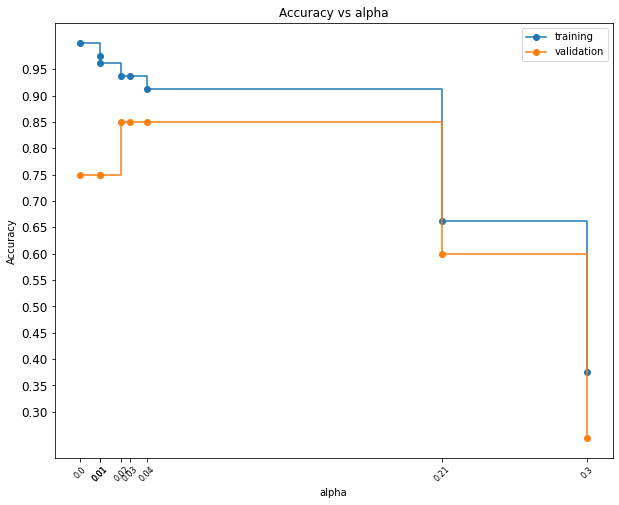

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=12, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
  


#Calculating the scores on training and validation sets
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

# Plot of performance on different value of alpha.
plt.figure(figsize = (10,8))
plt.plot(ccp_alphas, train_scores,marker='o', label="training",
        drawstyle="steps-post")
plt.plot(ccp_alphas, valid_scores, marker='o', label="validation",
        drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs alpha")
plt.legend()
rounded_ccp = [ round(elem, 2) for elem in ccp_alphas ]
locs, labels = plt.xticks()
plt.xticks(ccp_alphas, rounded_ccp, rotation = 45, fontsize = 8)
plt.yticks(np.arange(0.3,1,0.05), fontsize = 12)
plt.show()

The above plot shows the training and validation accuracy for different values of alpha.  The highest validation accuracy is 0.85 which occurs at three value of `ccp_alpha` at 0.024375,   0.0294181, and  0.0394327. According to __Occam's razor principle__, we will select a tree with `ccp_alpha = 0.0394327`. 

__Note:__ The greater the pruning is, the greater is the complexity reduction, and  higher is the value of ccp_alpha.

Finally, the structure of the pruned tree with `ccp_alpha` set to 0.0394327.. is plotted below.


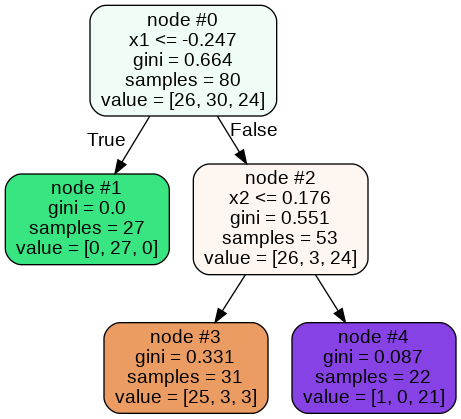

In [ ]:
# We add a very small number because cost_complexity_pruning_path() gives the boundary point.
# Each horizontal line in above plot corresponds to each tree structure.
delta = 0.0000001 
clf2 = DecisionTreeClassifier(ccp_alpha = 0.0394327+delta, random_state = 12)
clf2.fit(X_train, y_train)
plot_tree(clf2)

### Pruning Animation
Below shows the animation where the __nodes/sub-tree characterized by the smallest value of $\alpha$ are pruned sequentially__ to obtain a series of trees. Here, the red highlighted node represents the weakest link.


<div align="center">
<figure>
<!-- <img src="https://doc.google.com/a/fusemachines.com/uc?id=1-ZdcqK3bt9s1YoiZxxzuabaT-i3UY6Ll" > -->
<img src=https://i.postimg.cc/02gsLjRm/final-attempt.gif">
<figcaption>Figure 3: Iterative removal of weakest link generating a series of trees. </figcaption>
</figure>
</div>

We are now at the end of this chapter. In this chapter, we talked about the problems with early stopping. Then we introduced pruning, and different techniques of pruning. Finally, we talked about one of the most popular pruning techniques,  __Cost-Complexity pruning__, and implemented it in sklearn.


## Key Takeaways

- The arbitrarily selected value of early stopping criteria may underfit or overfit the tree.

- Pruning first grows the tree to its entirety and then removes insignificant branches.

- Cost-Complexity pruning generates a series of trees by pruning the weakest-link.
- Tree with the best performance on the validation dataset is selected.


## Additional Resources

* Pruning Techniques:
 * Lior Rokach, and Oded Maimon, [Decision Trees](http://www.ise.bgu.ac.il/faculty/liorr/hbchap9.pdf)
   * See Section 6.2, 6.3, 6.4, and 6.5 to read about different pruning techniques.

* Cost Complexity Pruning
 * John Mingers, [An  Empirical  Comparison  of  Pruning  Methods for  Decision  Tree  Induction](https://link.springer.com/content/pdf/10.1023/A:1022604100933.pdf)
   * Check page 229 and 230 about cost-complexity pruning

* Cost-Complexity Pruning Implementation
 * scikit-learn developers, [Post pruning decision trees with cost complexity pruning¶](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)
   * Check accuracy and total total impurity vs alpha
